## Construct interaction dataframe

After initially importing all 17 interactions from Nave's database (see [here](#initial-data-import)), we try to organize the interaction-assembly somewhat in the following cell.

In [1]:
import pandas as pd
import sys
sys.path.append("..")
import random_kingdominion as rk
from io import StringIO
import plotly.express as px
import numpy as np


In [20]:
interactions = rk.ALL_INTERACTIONS
cso_counts = {cso: interactions["Card1"].tolist().count(cso) + interactions["Card2"].tolist().count(cso) for cso in  rk.ALL_CSOS.index}
cso_counts = sorted(cso_counts.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(cso_counts, columns=["CSO", "Count"])
df = df[df["Count"] >= 1]
df["CSO Name"] = df["CSO"].apply(lambda x: rk.ALL_CSOS.loc[x]["Name"])
df["Expansion"] = df["CSO"].apply(lambda x: rk.ALL_CSOS.loc[x]["Final Expansion"]).astype("category")
df["Expansion count"] = df["Expansion"].map(lambda exp: np.sum(df[df["Expansion"] == exp]["Count"]))
df = df.sort_values(["Expansion count", "Count"], ascending=False)
print(df)
fig = px.histogram(df, x="Count", y="Expansion", orientation="h", text_auto=True)
fig.update_layout(
    yaxis=dict(automargin=True),
    margin=dict(l=20),
    height=800,
)
fig.show()


                      CSO  Count              CSO Name       Expansion  \
3    way_of_the_chameleon     29  Way of the Chameleon       Menagerie   
5        way_of_the_horse     28      Way of the Horse       Menagerie   
6                sheepdog     27              Sheepdog       Menagerie   
7    way_of_the_butterfly     27  Way of the Butterfly       Menagerie   
9         way_of_the_seal     26       Way of the Seal       Menagerie   
..                    ...    ...                   ...             ...   
72             royal_seal      6            Royal Seal  Prosperity, 1E   
101                vassal      3                Vassal        Base, 2E   
114               artisan      2               Artisan        Base, 2E   
155                  moat      1                  Moat        Base, 2E   
116             alchemist      2             Alchemist         Alchemy   

     Expansion count  
3                594  
5                594  
6                594  
7                59

In [268]:
"River Shrine/not your turn stuff"
"Livery/Fisherman"
"Sheepdog/Gain to hand"
"Grand Market/Counterfeit"
"Overlord/Reserve cards - If you play Overlord as {card_b}, no card will move to your Tavern mat."
"Overlord/Crew - If you play Overlord as Crew, it will stay in play until the next turn, fail to topdeck itself, and is discarded during Clean-up of that turn."
"Landing Party/Band of Misfits|Overlord - The Band of Misfits/Overlord will get discarded during Clean-up after having played Landing Party."
"Conjurer/Band of Misfits|Overlord - The Band of Misfits/Overlord will get discarded during Clean-up after having played Conjurer."
"Scepter/Highwayman"
"Summon/Reserve cards - beginning of turn effects of Reserve cards when Summoning them"
"Crypt/Capital"
"Loot/Changeling: You get to see the loot before deciding whether to exchange it for Changeling; if you do, it gets put back on top of the pile."
"Trail/BoN"
"Siren/BoN/Trail"
"Gatekeeper/Inn - If you gain an Inn while under the Gatekeeper attack (with no Inn in Exile), you need to Exile the gained Inn unless you shuffle it into your deck."
"Trickster/Capital doesn't work"
"Sheepdog/Old Witch - If you draw a Curse while reacting to a Curse gain from Old Witch with Sheepdog, you able to trash that Curse."
"Snowy Village/Villager cards: Using Villagers after having played Snowy Village will not give you + Actions; you can however get Villagers and save them for later."
"Urchin/Throne variant - If you play Urchin with {throne}, since it is not *another* Action, you may not trash the Urchin to gain a Mercenary."
"Capitalism/Landing Party - If you play an Action that has been turned into a Treasure by Capitalism as the first card on your turn, your Landing Parties will be topdecked, even if that happens during your Action phase."
"Lich/Journey - If you play Lich and buy Journey, the Journey turn is skipped, but your cards remain in play until your opponent's clean-up"

"Barbarian/Debt cost|<2P cost cards - trashes and turns them into Curse"
"Elder/Catacombs"
"Voyage/Black Market - Playing Treasures for BM during Voyage turn is limited by Voyage's restriction."
"Voyage/Trail - Playing Trail via its on-gain/on-trash/on-discard effect does not count as playing it from hand."
"Voyage/Weaver|Village Green - Playing {card_b} via its on-discard effect does not count as playing it from hand."
"Voyage/Courier|Herb Gatherer|Orb - Playing a card from your discard pile does not count as playing it from hand."
"Blockade/Moving the gained card interactions"
"Mission/Black Market - You cannot buy cards from the Black Market during Mission turns."
"Scavenger|Chancellor|Messenger/Trail|Village Green|Weaver|Tunnel - Playing {card_a} with {card_b} in your deck does not count as discarding it."
"Elder/Catacombs: If you choose both options after playing Catacombs with Elder, you put the first 3 cards into your hand, discard them (from your hand), and draw 3 different cards."
"Stonemason/Potion - You can overpay with Potions in order to gain Action cards with Potion costs."

# Self-reference stuff:
"Research trashing card costing $0 will make leave play the same turn"
"Church setting aside nothing will make it stay in play for the next turn nonetheless"
"Gear setting aside nothing will make it leave play the same turn"
"Crypt setting aside nothing will make it leave play the same turn"
"Tactician discarding nothing will make it leave play the same turn"
"Cargo Ship setting aside nothing will make it leave play the same turn"
"Playing Outpost on an Outpost turn will make it leave play the same turn"
"Prince setting aside nothing will make it stay in play indefinitely"
"Herald can topdeck itself as it's gained before the overpay stuff happens."
"Cauldron also counts cards played before playing Cauldron; if you have already gained more than 3 Action cards before playing it, it will fail to distribute Curses."
"Order of Astrologers - I know i can see the remaining cards while i'm choosing to topdeck. Can i also see while i'm deciding if i'm going to spend favors?"
"Rush - Buying Rush more than once in a row will be useless, as the second Rush will not be able to play the gained card."


## Initial data import

We import and sanitize the data taken from nave's database spreadsheet.

In [188]:
man = rk.KingdomManager()
man.load_tgg_dailies()
man.dataframe_repr


In [189]:
sub_df[df["winrate"] != ""]
cso_winrates = {}
for on_play_cso in rk.ALL_CSOS.index:
    subsub = sub_df[sub_df["cards"].apply(lambda x: on_play_cso in x)]
    if len(subsub) == 0:
        continue
    cso_winrates[on_play_cso] = subsub["winrate"].tolist()


In [124]:
import numpy as np
csos = rk.ALL_CSOS.copy()
csos["WR"] = [cso_winrates.get(cso) for cso in csos.index]
nowr = csos[csos['WR'].isna()].index.tolist()
print(f"{len(nowr)} CSOs with no wr: {", ".join(nowr)}")
print(f"{len(csos) - len(nowr)} CSOs with winrate.")
csos = csos[csos["WR"].notna()]
csos["WR_mean"] = csos["WR"].apply(lambda x: np.mean(x) if x is not None else np.nan)
csos["WR_std"] = csos["WR"].apply(lambda x: np.std(x) if x is not None else np.nan)
csos["WR_len"] = csos["WR"].apply(lambda x: len(x) if x is not None else 0)
csos = csos.sort_values("WR_mean", ascending=False)


408 CSOs with no wr: chancellor, woodcutter, feast, spy, thief, adventurer, copper, silver, gold, estate, duchy, province, curse, secret_chamber, great_hall, coppersmith, scout, saboteur, tribute, embargo, pearl_diver, ambassador, navigator, pirate_ship, sea_hag, explorer, ghost_ship, transmute, potion, loan, trade_route, talisman, contraband, counting_house, mountebank, royal_seal, venture, goons, platinum, colony, fortune_teller, bag_of_gold, diadem, followers, princess, trusty_steed, duchess, oracle, noble_brigand, nomad_camp, silk_road, cache, embassy, ill-gotten_gains, mandarin, abandoned_mine, ruined_library, ruined_market, ruined_village, survivors, dame_anna, dame_josephine, dame_molly, dame_natalie, dame_sylvia, sir_bailey, sir_destry, sir_martin, sir_michael, sir_vander, madman, mercenary, spoils, hovel, necropolis, overgrown_estate, masterpiece, coronet, courser, demesne, housecarl, huge_turnip, renown, alms, borrow, quest, save, scouting_party, travelling_fair, bonfire, exp

C:\Users\fabia\AppData\Local\Temp\ipykernel_1836\565518589.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset["Name"], rotation=40, ha="right")


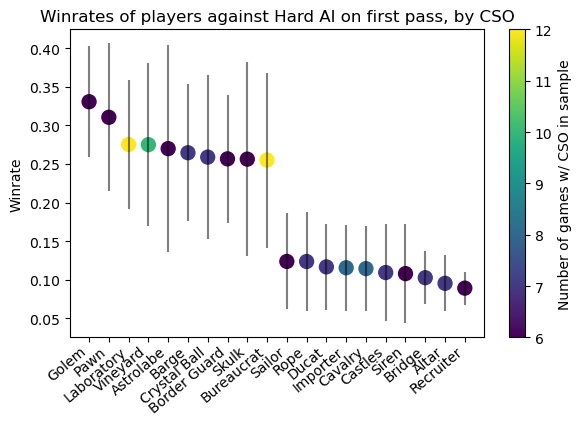

In [187]:
import matplotlib.pyplot as plt


cmap = plt.get_cmap('viridis')

subset = csos[csos["WR_len"] > 5]
# subset = csos[(csos["WR_mean"] > 0.3) | (csos["WR_mean"] < 0.1)]

subset = pd.concat([subset.iloc[:10], subset.iloc[-10:]])

fig, ax = plt.subplots(figsize=(len(subset)/3, 4))
ax.errorbar(subset["Name"], subset["WR_mean"], yerr=subset["WR_std"], fmt="o", c="none", ecolor="black", alpha=0.5)
cax = ax.scatter(subset["Name"], subset["WR_mean"], c=subset["WR_len"], cmap=cmap, s=100, marker="o", alpha=1)
fig.colorbar(cax, label="Number of games w/ CSO in sample")


ax.set_ylabel("Winrate")
ax.set_title("Avg. winrates of players against Hard AI on first pass, by CSO")
ax.set_xticks(range(len(subset["Name"])))
ax.set_xticklabels(subset["Name"], rotation=40, ha="right")
# Offset the xticklabels
for label in ax.get_xticklabels():
    label.set_position((label.get_position()[0] + 1, label.get_position()[1] + 0.01))  # Adjust the offset as needed
ax.axhline()


In [200]:
expansions = np.unique([exp for exps in sub_df["expansions"] for exp in exps])
exp_winrates = {}
for exp in expansions:
    subsub = sub_df[sub_df["expansions"].apply(lambda x: exp in x)]
    if len(subsub) == 0:
        continue
    exp_winrates[exp] = subsub["winrate"].tolist()


In [202]:
exp_pd.DataFrame(index=expansions)
exp_df["Name"] = exp_df.index
exp_df["WR"] = [exp_winrates.get(exp) for exp in exp_df.index]
exp_df["WR_mean"] = exp_df["WR"].apply(lambda x: np.mean(x) if x is not None else np.nan)
exp_df["WR_std"] = exp_df["WR"].apply(lambda x: np.std(x) if x is not None else np.nan)
exp_df["WR_len"] = exp_df["WR"].apply(lambda x: len(x) if x is not None else 0)
exp_exp_df.sort_values("WR_mean", ascending=False)
# exp_df


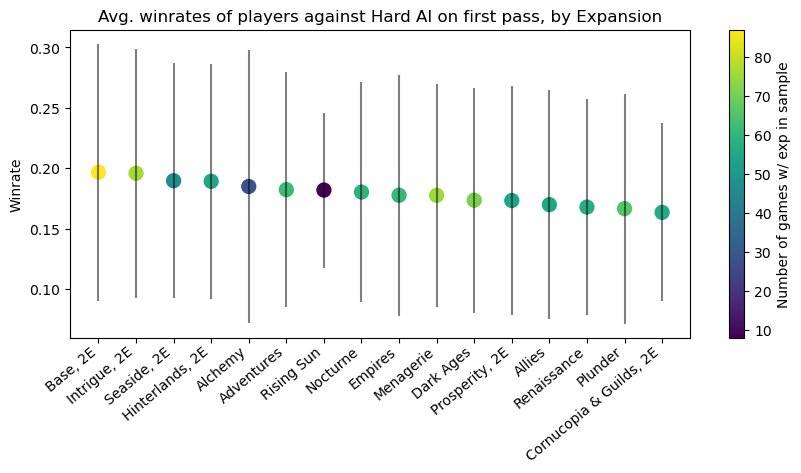

In [206]:
subset = exp_df[~exp_df["Name"].str.contains("1E")]
fig, ax = plt.subplots(figsize=(10, 4))

ax.errorbar(subset["Name"], subset["WR_mean"], yerr=subset["WR_std"], fmt="o", c="none", ecolor="black", alpha=0.5)
cax = ax.scatter(subset["Name"], subset["WR_mean"], c=subset["WR_len"], cmap=cmap, s=100, marker="o", alpha=1)
fig.colorbar(cax, label="Number of games w/ exp in sample")

ax.set_ylabel("Winrate")
ax.set_title("Avg. winrates of players against Hard AI on first pass, by Expansion")
ax.set_xticks(range(len(subset["Name"])))
ax.set_xticklabels(subset["Name"], rotation=40, ha="right")
# Offset the xticklabels
for label in ax.get_xticklabels():
    label.set_position((label.get_position()[0] + 1, label.get_position()[1] + 0.01))  # Adjust the offset as needed



In [216]:


pd.read_csv("./Dominion Rules Lookup - Database.csv", header=0, skiprows=[1], index_col=0)

df.dropna(how='all')

stacked_df.stack()
non_nan_pairs = stacked_df.to_dict()


unique_keys = set()
for k in non_nan_pairs.keys():
    unique_keys.add(tuple(sorted(k)))

full_text = ""
for k in sorted(unique_keys):
    assert non_nan_pairs[k] == non_nan_pairs[k[::-1]], f"Key {k} is not symmetric"
    text = rk.sanitize_cso_name(k[0]) + "," + rk.sanitize_cso_name(k[1]) + f',"{non_nan_pairs[k].replace("\"", "'")}"'
    full_text += text + "\n"

cols = ["Card1", "Card2", "Rule"]
pd.read_csv(StringIO(full_text.replace("’", "'")), header=None, names=cols)
df["ident"] = df["Card1"] + "___" + df["Card2"]
df.set_index("ident", inplace=True)
# df[df.index.str.contains("souk")].iloc[0]["Rule"]
text = df.apply(lambda x: f"add_interaction(\"{x['Card1']}\", \"{x['Card2']}\", \"{x['Rule']}\", df)", axis=1)
text = "\n".join(text)
print(text)


add_interaction("band_of_misfits", "garrison", "If you play a Garrison using Band of Misfits, you can't put tokens on Garrison because it's not in play, and you don't put tokens on Band of Misfits either. This means it won't draw any cards next turn and will be discarded this turn.", df)
add_interaction("black_market", "encampment", "When you play an Encampment that came from the Black Market deck, if you don't reveal a Gold or Plunder, then you set aside the Encampment but since it has no pile to return to, it stays set aside for the rest of the game (it still counts as one of your cards for scoring).", df)
add_interaction("black_market", "experiment", "If you play an Experiment that was bought from the Black Market deck, you get +2 Cards and +1 Action, but it does not return to a pile. This is because Experiment does not have a pile to return to.", df)
add_interaction("black_market", "way_of_the_horse", "If you play a card from the Black Market deck using Way of the Horse, you get +2